<a href="https://colab.research.google.com/github/Apoorvdhavalikar27/Deep_Learning/blob/main/TensorFlow_with_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow with GPU

This notebook provides an introduction to computing on a [GPU](https://cloud.google.com/gpu) in Colab. In this notebook you will connect to a GPU, and then run some basic TensorFlow operations on both the CPU and a GPU, observing the speedup provided by using the GPU.


In [60]:
import tensorflow as tf
from tensorflow import keras

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()

In [63]:
len(X_train)

50000

In [64]:
X_train.shape
# here 3 is color diamentions R,G,B

(50000, 32, 32, 3)

In [65]:
def show_image(index):
  plt.figure(figsize= (10,1))
  plt.imshow(X_train[index])

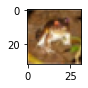

In [66]:
show_image(0)

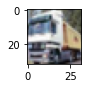

In [67]:
show_image(1)

In [68]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [69]:
X_train = X_train / 255
X_test = X_test / 255

In [70]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [71]:
classes[y_train[1,0]]

'truck'

In [72]:
y_train_categorical = keras.utils.to_categorical(
    y_train,num_classes=10, dtype = 'float32'
    )
y_train_categorical[0:4]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [73]:
y_test_categorical = keras.utils.to_categorical(y_test,num_classes=10, dtype = 'float32')
y_test_categorical[0:4]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [74]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (32,32,3)),
                          keras.layers.Dense(3000,activation='relu'),
                          keras.layers.Dense(1000,activation='relu'),
                          keras.layers.Dense(500,activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')

])
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [75]:
model.fit(X_train,y_train_categorical,epochs=500)

Epoch 1/500
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8928 - accuracy: 0.3191
Epoch 2/500
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6843 - accuracy: 0.3925
Epoch 3/500
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5935 - accuracy: 0.4269
Epoch 4/500
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5386 - accuracy: 0.4492
Epoch 5/500
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4946 - accuracy: 0.4629
Epoch 6/500
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4601 - accuracy: 0.4747
Epoch 7/500
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4263 - accuracy: 0.4863
Epoch 8/500
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3977 - accuracy: 0.4985
Epoch 9/500
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3708 - accuracy: 0.5064
Epoch 10/500
1563/1563 [==============================] - 7s 5ms/step - l

In [76]:
y_prediction =  model.predict(X_test)
y_predict = []
for i in range(len(y_test)):
  y_predict.append (np.argmax(y_prediction[i]))
y_predict[:10]

[0, 1, 8, 0, 0, 0, 0, 0, 2, 1]

In [77]:
y_test[:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)

In [78]:
model.evaluate(X_test,y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 26.4630 - accuracy: 0.4381


[26.462989807128906, 0.43810001015663147]